<Figure size 500x500 with 0 Axes>

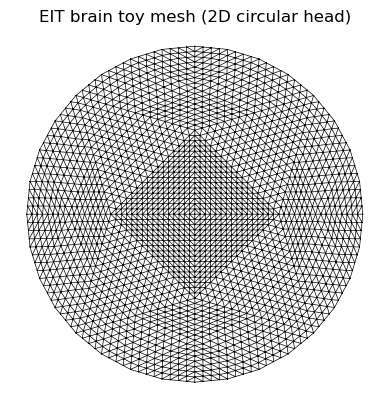

<Figure size 500x500 with 0 Axes>

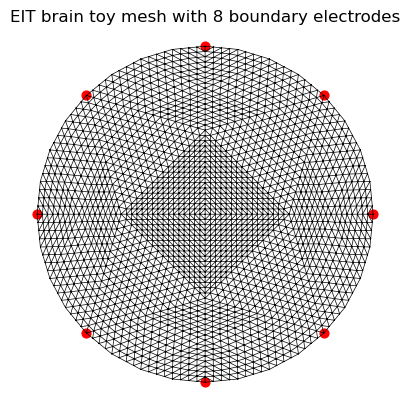

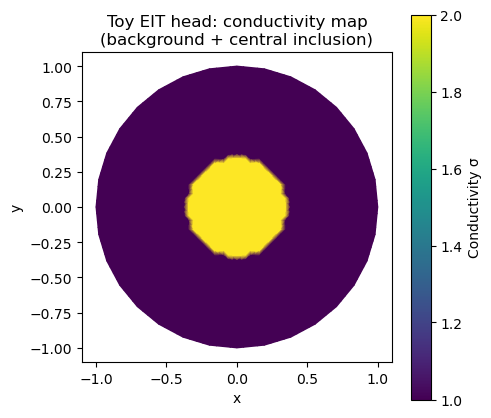

In [15]:
# ============================================
# 2D EIT Brain Toy Model (Mesh + Electrodes + Conductivity Map)
# ============================================

# ==== Step 0: Imports ====
import numpy as np
import matplotlib.pyplot as plt

from skfem import MeshTri, Basis
from skfem.element import ElementTriP1
from skfem.visuals.matplotlib import draw


# ==== Step 1: Build a circular "head" mesh and finite element basis ====
# Create a unit circle mesh (our toy head)
mesh = MeshTri.init_circle()

# Refine the mesh to make it smoother (2 or 3 is fine)
mesh = mesh.refined(2)

# Define linear triangular elements (P1) on this mesh
basis = Basis(mesh, ElementTriP1())


# ==== Step 2: Visualise the mesh ====
plt.figure(figsize=(5, 5))
draw(mesh)
plt.gca().set_aspect('equal')
plt.title("EIT brain toy mesh (2D circular head)")
plt.show()


# ==== Step 3: Place boundary electrodes around the head ====
# Choose how many electrodes you want
num_electrodes = 8  # you can change to 4, 8, 16, etc.

# Angles (in radians) evenly spaced around the circle
theta = np.linspace(0, 2 * np.pi, num_electrodes, endpoint=False)

# Convert to (x, y) positions on the unit circle
elec_pts = np.column_stack((np.cos(theta), np.sin(theta)))

# Plot mesh + electrodes
plt.figure(figsize=(5, 5))
draw(mesh)
plt.scatter(elec_pts[:, 0], elec_pts[:, 1], c='red', s=40)
plt.gca().set_aspect('equal')
plt.title(f"EIT brain toy mesh with {num_electrodes} boundary electrodes")
plt.show()


# ==== Step 4: Define a conductivity distribution σ(x, y) on the mesh ====
# Node coordinates from the mesh
x_nodes = mesh.p[0, :]
y_nodes = mesh.p[1, :]

# Background conductivity = 1 everywhere
sigma = np.ones_like(x_nodes)

# Add a central "lesion" / inclusion with higher conductivity
r_lesion = 0.35  # radius of inclusion
inside_lesion = x_nodes**2 + y_nodes**2 < r_lesion**2
sigma[inside_lesion] = 2.0  # higher conductivity in the lesion


# ==== Step 5: Visualise conductivity on the finite element mesh ====
fig, ax = plt.subplots(figsize=(5, 5))

# mesh.t.T gives triangles as (n_elements, 3) connectivity
triangles = mesh.t.T

# Plot scalar field sigma over the mesh using triangular patches
im = ax.tripcolor(x_nodes, y_nodes, triangles, sigma, shading='gouraud')

ax.set_aspect('equal')
cbar = fig.colorbar(im, ax=ax, label="Conductivity σ")
ax.set_title("Toy EIT head: conductivity map\n(background + central inclusion)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()